# Seasonality of Returns:

- Study the performance of weekly segmented returns on a given tradable security

In [1]:
import pickle 
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

from backtest_tools import portfolio_tools as pt, risk_analysis as ra

In [7]:
# Define investment universe of ETFs
assets = ['TLT']

# Returns of opening prices
open_asset_returns = pd.DataFrame()
# Returns of close prices
close_asset_returns = pd.DataFrame()

i = 0
for ticker in assets:
    prices = yf.download(ticker, start='1980-01-01', end=dt.date.today())
    
    # Get i'th asset's returns
    close_rets = prices['Adj Close'].pct_change().dropna()
    close_rets = close_rets.rename(ticker)
    open_rets = prices['Open'].pct_change().dropna()
    open_rets = open_rets.rename(ticker)

    close_asset_returns = pd.concat([close_asset_returns, close_rets], axis=1)
    open_asset_returns = pd.concat([open_asset_returns, open_rets], axis=1)

[*********************100%***********************]  1 of 1 completed


In [8]:
def add_week_of_month(returns: pd.Series):
    weeks = pd.Series(pd.to_numeric(returns.index.day/7), index=returns.index, name='Week')
    weeks = weeks.apply(lambda x: np.ceil(x))
    return pd.concat([returns, weeks], axis=1)

<AxesSubplot:>

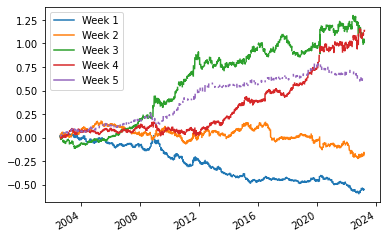

In [10]:
weekly_returns = add_week_of_month(close_asset_returns.TLT) # 'XLF', 'BOIL', 'UVXY', 'FXI', 'GDX', 'IWM', 'XLE'
first_week = weekly_returns.where(weekly_returns['Week'] == 1).iloc[:, 0]
first_week.name = 'Week 1'
second_week = weekly_returns.where(weekly_returns['Week'] == 2).iloc[:, 0]
second_week.name = 'Week 2'
third_week = weekly_returns.where(weekly_returns['Week'] == 3).iloc[:, 0]
third_week.name = 'Week 3'
forth_week = weekly_returns.where(weekly_returns['Week'] == 4).iloc[:, 0]
forth_week.name = 'Week 4'
fifth_week = weekly_returns.where(weekly_returns['Week'] == 5).iloc[:, 0]
fifth_week.name = 'Week 5'

weekly_segmented_returns = pd.concat([first_week, second_week, third_week, forth_week, fifth_week], axis=1)
pt.cumulative_returns(weekly_segmented_returns).plot()